In [16]:
import collections
import itertools
import json
import os
import re
import glob
import operator

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

In [2]:
def compute_accuracy(rows):
    levels = ['easy', 'medium', 'hard', 'extra', 'all']
    total = collections.defaultdict(int)
    exact = collections.defaultdict(int)
    for row in rows:
        exact[row['hardness']] += row['exact']
        exact['all'] += row['exact']
        total[row['hardness']] += 1
        total['all'] += 1
    
    result = {hardness: exact[hardness] / total[hardness]
              for hardness in levels}
    result = {**result, **{'{} count'.format(hardness): total[hardness] for hardness in levels}}
    return result

In [17]:
accuracy_per_run = collections.defaultdict(dict)
rows = []
for d in sorted(glob.glob('../logdirs/20190521-ablations/*')):
    exp_name = os.path.basename(d)
    exp_vars = re.match('glove=([^,]+),upd_type=([^,]+),num_layers=([^,]+),att=(\d+)', exp_name).groups()

    eval_paths = glob.glob(os.path.join(d, 'eval-val-step*-bs1.jsonl'))
    all_scores = []
    best = (0, 0)
    for eval_path in eval_paths:
        step = int(re.search('step(\d+)', eval_path).group(1))
        scores = json.load(open(eval_path))
        first_half_exact = compute_accuracy(scores['per_item'][:517])
        second_half_exact = compute_accuracy(scores['per_item'][517:])
        all_scores.append((step, scores['total_scores']['all']['exact'], first_half_exact['all'], second_half_exact['all']))
    
    all_scores.sort(key=operator.itemgetter(0))
    sorted_scores = sorted(all_scores, reverse=True, key=operator.itemgetter(1))
    rows.append(exp_vars + (len(eval_paths),) + (sorted_scores[0] if sorted_scores else (-1, -1, -1, -1)))
    accuracy_per_run[exp_name] = {
        'x': [s[0] for s in all_scores],
        'all': [s[1] for s in all_scores],
        '1/2': [s[2] for s in all_scores],
        '2/2': [s[3] for s in all_scores],
    }
    print(d)
    
df = pd.DataFrame(rows, columns=('glove', 'upd_type', 'num_layers', 'att', 'num steps eval', 'step', 'acc', '1/2 acc', '2/2 acc'))

../logdirs/20190521-ablations/glove=false,upd_type=full,num_layers=4,att=0
../logdirs/20190521-ablations/glove=false,upd_type=full,num_layers=4,att=1
../logdirs/20190521-ablations/glove=false,upd_type=full,num_layers=4,att=2
../logdirs/20190521-ablations/glove=true,upd_type=full,num_layers=0,att=0
../logdirs/20190521-ablations/glove=true,upd_type=full,num_layers=0,att=1
../logdirs/20190521-ablations/glove=true,upd_type=full,num_layers=0,att=2
../logdirs/20190521-ablations/glove=true,upd_type=full,num_layers=2,att=0
../logdirs/20190521-ablations/glove=true,upd_type=full,num_layers=2,att=1
../logdirs/20190521-ablations/glove=true,upd_type=full,num_layers=2,att=2
../logdirs/20190521-ablations/glove=true,upd_type=merge_types,num_layers=4,att=0
../logdirs/20190521-ablations/glove=true,upd_type=merge_types,num_layers=4,att=1
../logdirs/20190521-ablations/glove=true,upd_type=merge_types,num_layers=4,att=2
../logdirs/20190521-ablations/glove=true,upd_type=no_subtypes,num_layers=4,att=0
../logd

In [13]:
df

,glove,upd_type,num_layers,att,num steps eval,step,acc,1/2 acc,2/2 acc
0,false,full,4,0,21,11100,0.277563,0.321083,0.234043
1,false,full,4,1,21,14100,0.256286,0.276596,0.235977
2,false,full,4,2,20,17100,0.253385,0.294004,0.212766
3,true,full,0,0,20,17100,0.255319,0.255319,0.255319
4,true,full,0,1,20,10100,0.232108,0.235977,0.228240
5,true,full,0,2,19,15100,0.240812,0.230174,0.251451
6,true,full,2,0,17,12100,0.408124,0.400387,0.415861
7,true,full,2,1,18,5100,0.404255,0.402321,0.406190
8,true,full,2,2,17,13100,0.392650,0.381044,0.404255
9,true,merge_types,4,0,15,15100,0.281431,0.274662,0.288201


In [18]:
df

,glove,upd_type,num_layers,att,num steps eval,step,acc,1/2 acc,2/2 acc
0,false,full,4,0,40,11100,0.277563,0.321083,0.234043
1,false,full,4,1,40,34100,0.259188,0.282398,0.235977
2,false,full,4,2,40,26100,0.269826,0.286267,0.253385
3,true,full,0,0,40,38100,0.259188,0.270793,0.247582
4,true,full,0,1,40,33100,0.242747,0.243714,0.241779
5,true,full,0,2,40,39100,0.246615,0.253385,0.239845
6,true,full,2,0,40,12100,0.408124,0.400387,0.415861
7,true,full,2,1,40,39100,0.426499,0.425532,0.427466
8,true,full,2,2,40,25100,0.402321,0.411992,0.392650
9,true,merge_types,4,0,40,24100,0.296905,0.288201,0.305609


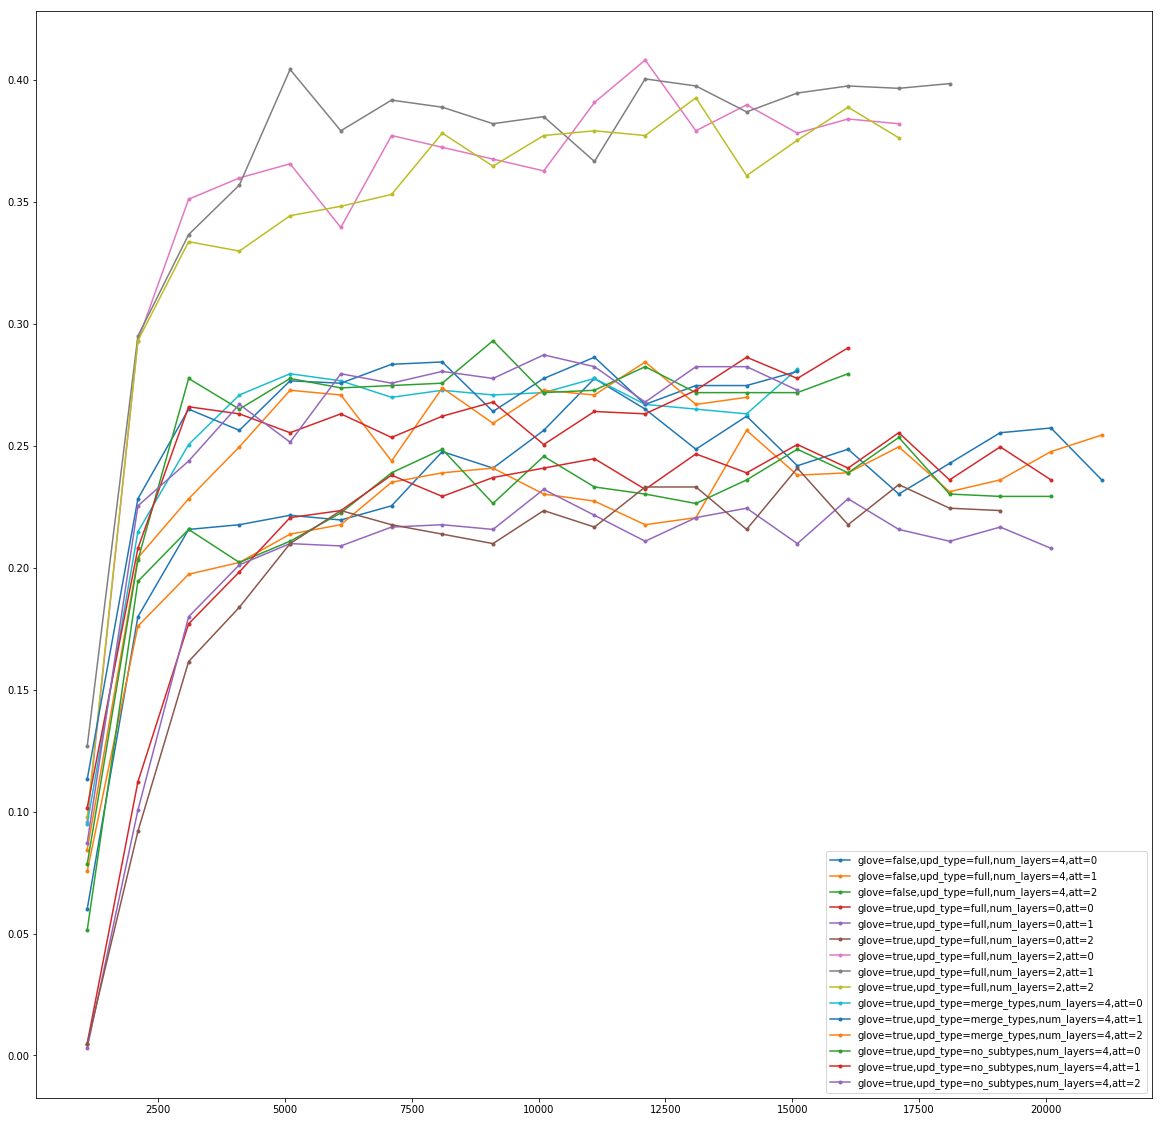

In [15]:
# See how accuracy varies over time
for k, v in sorted(accuracy_per_run.items()):
    plt.plot(v['x'], v['all'], marker='.', label=k)
plt.legend()

In [20]:
dev = json.load(open('../data/spider-20190205/dev.json'))
def compare(data, left, right):
    both_exact = []
    left_exact = []
    right_exact = []
    neither_exact = []
    for i, (data_item, left_item, right_item) in enumerate(zip(data, left['per_item'], right['per_item'])):
        result = {
            'i': i,
            'db_id': data_item['db_id'],
            'question': data_item['question'],
            'gold': data_item['query'],
            'left': left_item['predicted'],
            'right': right_item['predicted'],
        }
        
        if left_item['exact'] and right_item['exact']:
            both_exact.append(result)
        elif left_item['exact']:
            left_exact.append(result)
        elif right_item['exact']:
            right_exact.append(result)
        else:
            neither_exact.append(result)
    return both_exact, left_exact, right_exact, neither_exact        

In [22]:
both_exact, left_exact, right_exact, neither_exact = compare(
    dev,
    json.load(open('../logdirs/20190428-random/fixed=init,att=0/eval-val-step38100-bs1.jsonl')),
    json.load(open('../logdirs/20190428-random/fixed=init,att=1/eval-val-step33100-bs1.jsonl')))
len(both_exact)/len(dev), len(left_exact)/len(dev), len(right_exact)/len(dev)

(0.27949709864603484, 0.09671179883945841, 0.08317214700193423)

In [23]:
both_exact, left_exact, right_exact, neither_exact = compare(
    dev,
    json.load(open('../logdirs/20190428-random/fixed=data+model,att=0/eval-val-step37100-bs1.jsonl')),
    json.load(open('../logdirs/20190428-random/fixed=data+model,att=1/eval-val-step40000-bs1.jsonl')))
len(both_exact)/len(dev), len(left_exact)/len(dev), len(right_exact)/len(dev)

(0.27852998065764023, 0.09090909090909091, 0.10348162475822051)

In [26]:
both_exact, left_exact, right_exact, neither_exact = compare(
    dev,
    json.load(open('../logdirs/20190428-stability/bs=100,lr=1.0e-03,end_lr=0e0,att=0/eval-val-step10100-bs1.jsonl')),
    json.load(open('../logdirs/20190428-stability/bs=50,lr=1.0e-03,end_lr=0e0,att=0/eval-val-step21100-bs1.jsonl')))
len(both_exact)/len(dev), len(left_exact)/len(dev), len(right_exact)/len(dev)

(0.3181818181818182, 0.08704061895551257, 0.08317214700193423)